## Multimode CCR Model
ref:  
1. Costanzo, S.; Huang, Q.; Ianniruberto, G.; Marrucci, G.; Hassager, O.; Vlassopoulos, D. Shear and Extensional Rheology of Polystyrene Melts and Solutions with the Same Number of Entanglements. *Macromolecules* __2016__, 49, 3925-3935.  
2. Ianniruberto, G., and G. Marrucci, On compatibility of the Cox-Merz rule with the model of Doi and 
Edward.”* J. Non-Newtonian Fluid Mech*.__1996__,  65, 24-–24)
3. Mead, D. W., R. G. Larson, and M. Doi, A molecular theory for fast flows of entangled polymers. *
Macromolecule*s__1998__,  31, 789-–791)
4. Ianniruberto, G. Quantitative appraisal of a new CCR model for entangled linear polymers. *Journal of Rheology* __2015__, 59, 211-235...
$$\begin{align}
\mathbf{S}_i(t) &= \int_{-\infty}^t \left[\frac{1}{\tau_i(t')}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau_i(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,t')\right] dt' \\
\frac{d\lambda}{dt} &= \lambda\boldsymbol{\kappa}:\overline{\mathbf{S}} - \frac{\lambda F(\lambda)-1}{\tau_R} \\
r &= \mathbf{k}:\overline{\mathbf{S}} - \frac{1}{\lambda}\frac{d\lambda}{dt}\\
\frac{1}{\tau_i(t)} &=\frac{1}{\tau_{i,eq}}+\beta r\\
F(\lambda)&=\left(\frac{\lambda_{max}^2-\frac{\lambda^2}{3}}{\lambda_{max}^2-\lambda^2}\right)\left(\frac{\lambda_{max}^2-1}{\lambda_{max}^2-\frac{1}{3}}\right) \\
\overline{\mathbf{S}} &= \int_{-\infty}^t \left[\frac{1}{\tau_d(t')}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau_d(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,t')\right] dt'\\
\tau_d(t) &= \frac{\sum_iG_i\tau_i^2(t)}{\sum_i G_i\tau_i(t)}\\
\boldsymbol{\sigma} &= C_Q F(\lambda)\lambda^2\sum{G_i\boldsymbol{S}_i}
\end{align}$$  
Here,
$C_Q = 6$ if $\mathbf{Q} = \frac{\mathbf{B}^{1/2}}{\mathrm{Tr}\mathbf{B}^{1/2}}$
$r$ is tube loss rate, is non-negative difference represents the rate by which "old" tube is being lost at the chain ends because of flow and therefore constitutes the relevant quantity in the CCR model.  
$\beta$ is unknown coefficient, try $\beta = 0.5$ or $\beta=0.25$.  
Tumbling term of $\lambda$ (shear case only):  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab
from IM_Model import IM_Multimode_integral
import time

In [3]:
#parameters for PS133k in ref: Costanzo, S. et al. Macromolecules 2016, 49, 3925-3935.
GN0 = 2.79E5
τc = 1.24E-3
τR = 0.124
λmax = 3.34
CQ = 6
β = 0.25
Gi = np.array([1.14E2, 2.52, 8.80E-1, 3.81E-1, 2.07E-1, 1.70E-1, 1.76E-1, 1.37E-1, 2.03E-1]) * GN0
τi_eq = np.array([2.16E-3, 5.90E-2, 3.33E-1, 1.53, 6.87, 2.9E1, 1.11E2, 3.63E2, 8.92E2]) * τc
shear_rate=31.6
δt=0.001
finish_time=10

In [4]:
t0 = time.time()
t_span, τd_span, σ_span, λ_span, S_span = IM_Multimode_integral(λmax=λmax,
                                                                τR=τR,
                                                                shear_rate=shear_rate,
                                                                β = β,
                                                                δt=δt,
                                                                finish_time=finish_time,
                                                                Gi=Gi,
                                                                τi_eq=τi_eq,
                                                                CQ=CQ)
print('Cost time: ', time.time() - t0, ' s')

Cost time:  34.574214220047  s


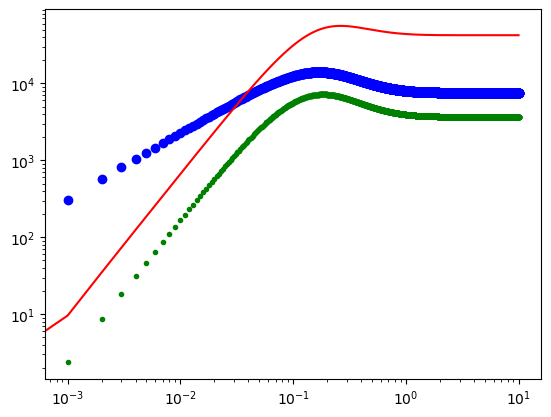

In [5]:
pylab.loglog(t_span-δt,σ_span[:,0,1]/shear_rate,'bo')
pylab.loglog(t_span-δt,(σ_span[:,0,0]-σ_span[:,1,1])/shear_rate,'r-')
pylab.loglog(t_span-δt,(σ_span[:,2,2]-σ_span[:,1,1])/shear_rate,'g.')

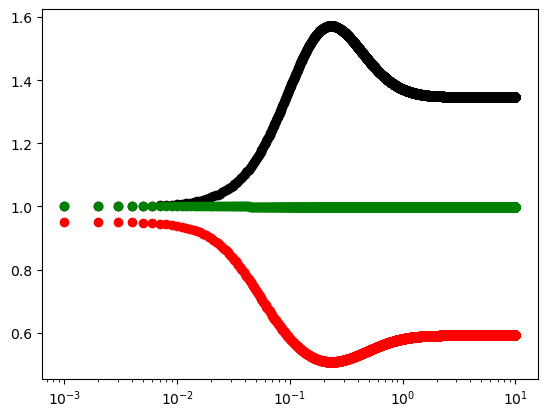

In [6]:
pylab.semilogx(t_span,τd_span,'ro')
pylab.semilogx(t_span,λ_span,'ko')
pylab.semilogx(t_span,np.trace(S_span,axis1=1,axis2=2),'go')